<a href="https://colab.research.google.com/github/nhale42x/Statistical-Theory/blob/main/FA8final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading required package: ggpubr



[1] "Dataset Head:"


,weight,group
,<dbl>,<chr>
1,4.17,ctrl
2,5.58,ctrl
3,5.18,ctrl
4,6.11,ctrl
5,4.50,ctrl
6,4.61,ctrl


[1] "Unique groups in the independent variable (group): ctrl, trt1, trt2"
[1] "Outliers in group ctrl :"
numeric(0)
[1] "Outliers in group trt1 :"
[1] 5.87 6.03
[1] "Outliers in group trt2 :"
numeric(0)


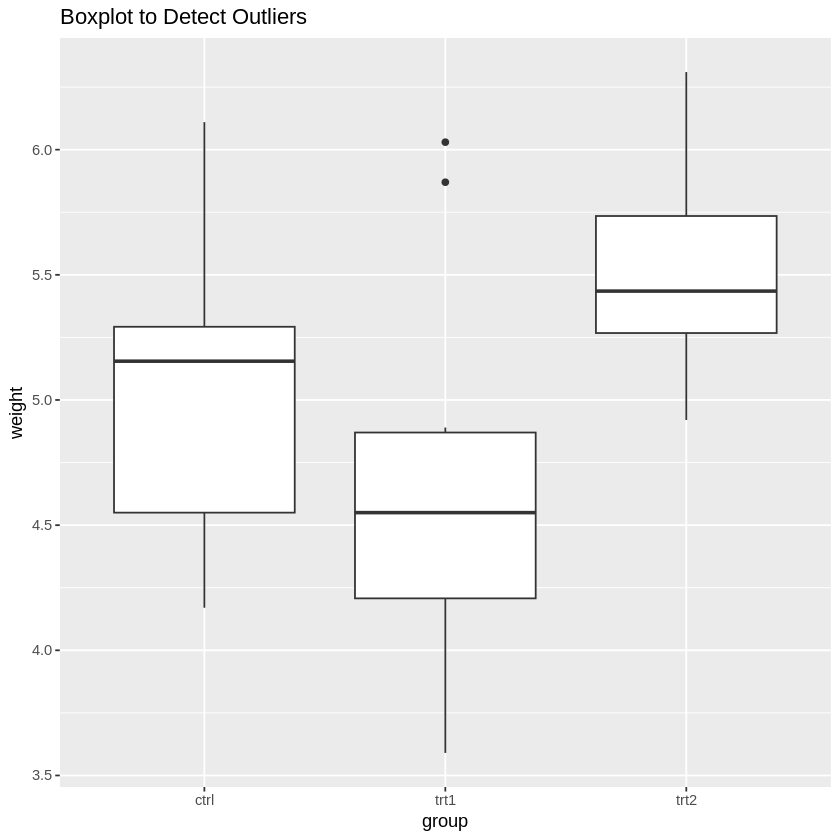

[1] "Shapiro-Wilk Test for group ctrl : W = 0.956681490411735 , p-value = 0.747473443829621"
[1] "Shapiro-Wilk Test for group trt1 : W = 0.930410693515037 , p-value = 0.45194396031826"
[1] "Shapiro-Wilk Test for group trt2 : W = 0.94100519724202 , p-value = 0.564251894771995"


Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


[1] "Levene's Test for Homogeneity of Variances:"
Levene's Test for Homogeneity of Variance (center = median)
      Df F value Pr(>F)
group  2  1.1192 0.3412
      27               
[1] "One-Way ANOVA Results:"
            Df Sum Sq Mean Sq F value Pr(>F)  
group        2  3.766  1.8832   4.846 0.0159 *
Residuals   27 10.492  0.3886                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

APA-Style Report:
A one-way ANOVA was conducted to examine the effect of group on plant weight. There was a significant effect of group on plant weight, F(2, 27) = 4.85, p = 0.016.
[1] "Tukey HSD Post-hoc Test Results:"
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = weight ~ group, data = data)

$group
            diff        lwr       upr     p adj
trt1-ctrl -0.371 -1.0622161 0.3202161 0.3908711
trt2-ctrl  0.494 -0.1972161 1.1852161 0.1979960
trt2-trt1  0.865  0.1737839 1.5562161 0.0120064



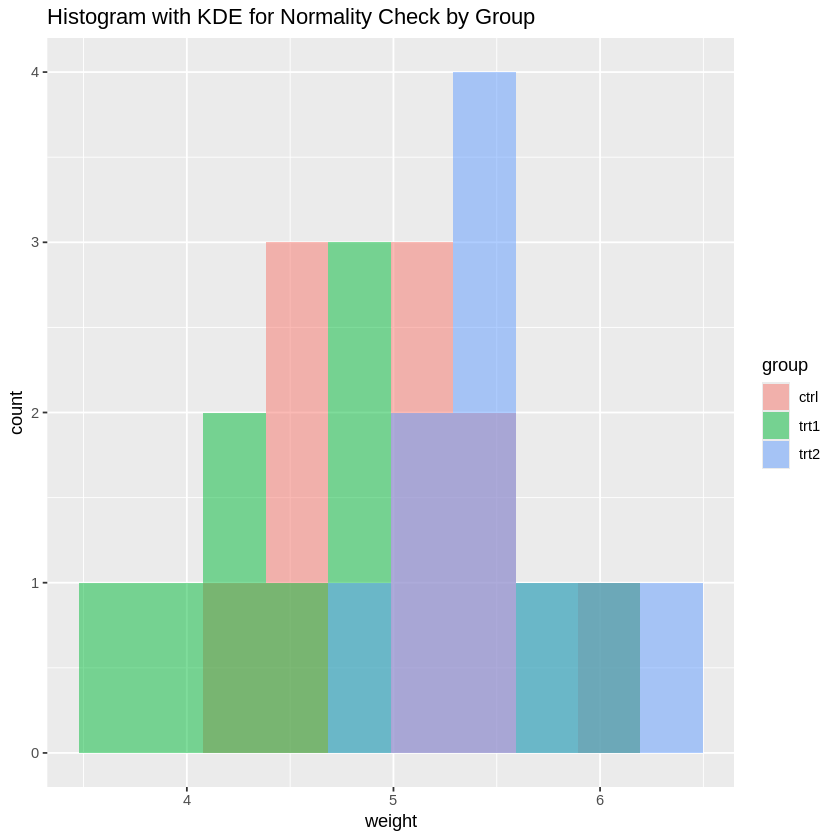

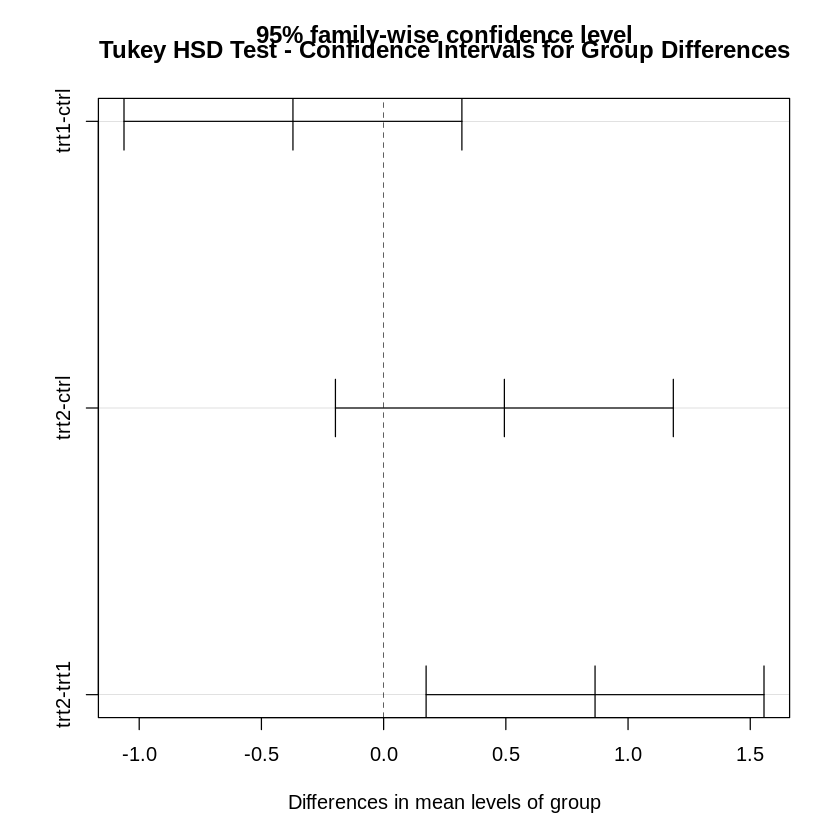

In [5]:
# Load required libraries
if(!require(tidyverse)) install.packages("tidyverse", dependencies=TRUE)
if(!require(car)) install.packages("car", dependencies=TRUE)
if(!require(ggpubr)) install.packages("ggpubr", dependencies=TRUE)

# Load the data
data <- read.csv("/content/plantgrowth.csv")

# Display first few rows of the data
print("Dataset Head:")
head(data)

# --- Assumption Testing ---

# Assumption 1: Dependent variable should be continuous (assumed for 'weight')

# Assumption 2: Independent variable should have three or more groups
unique_groups <- unique(data$group)
print(paste("Unique groups in the independent variable (group):", paste(unique_groups, collapse=", ")))

# Assumption 3: Independence of observations is assumed from experimental design

# Assumption 4: No significant outliers
library(ggplot2)
ggplot(data, aes(x = group, y = weight)) +
  geom_boxplot() +
  ggtitle("Boxplot to Detect Outliers")

# Checking outliers numerically using the IQR method
for(group in unique(data$group)) {
  group_data <- data[data$group == group, "weight"]
  Q1 <- quantile(group_data, 0.25)
  Q3 <- quantile(group_data, 0.75)
  IQR <- Q3 - Q1
  lower_bound <- Q1 - 1.5 * IQR
  upper_bound <- Q3 + 1.5 * IQR
  outliers <- group_data[group_data < lower_bound | group_data > upper_bound]
  print(paste("Outliers in group", group, ":"))
  print(outliers)
}

# Assumption 5: Normality within each group
ggplot(data, aes(x = weight, fill = group)) +
  geom_histogram(bins = 10, alpha = 0.5, position = 'identity') +
  ggtitle("Histogram with KDE for Normality Check by Group")

# Shapiro-Wilk test for normality in each group
for(group in unique(data$group)) {
  group_data <- data[data$group == group, "weight"]
  shapiro_test <- shapiro.test(group_data)
  print(paste("Shapiro-Wilk Test for group", group, ": W =", shapiro_test$statistic, ", p-value =", shapiro_test$p.value))
}

# Assumption 6: Homogeneity of variances (Levene's test)
levene_test <- car::leveneTest(weight ~ group, data = data)
print("Levene's Test for Homogeneity of Variances:")
print(levene_test)

# --- One-Way ANOVA ---

# Perform One-Way ANOVA
anova_model <- aov(weight ~ group, data = data)
anova_summary <- summary(anova_model)
print("One-Way ANOVA Results:")
print(anova_summary)

# APA-style Report
F_value <- anova_summary[[1]]$`F value`[1]
p_value <- anova_summary[[1]]$`Pr(>F)`[1]
df_between <- anova_summary[[1]]$Df[1]
df_within <- anova_summary[[1]]$Df[2]

apa_report <- paste(
  "\nAPA-Style Report:\n",
  "A one-way ANOVA was conducted to examine the effect of group on plant weight. ",
  "There was a ", ifelse(p_value < 0.05, "significant", "non-significant"),
  " effect of group on plant weight, F(", df_between, ", ", df_within,
  ") = ", round(F_value, 2), ", p = ", round(p_value, 3), ".\n", sep = ""
)
cat(apa_report)

# --- Post-hoc Test (Tukey HSD) if ANOVA is significant ---
if (p_value < 0.05) {
  tukey_results <- TukeyHSD(anova_model)
  print("Tukey HSD Post-hoc Test Results:")
  print(tukey_results)

  plot(tukey_results)
  title(main = "Tukey HSD Test - Confidence Intervals for Group Differences")
}
